In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pydicom
from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


C:\Users\hanna\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('.gitignore/stage_1_detailed_class_info.csv')
test_Dayer = pd.read_csv('.gitignore/stage_1_sample_submission.csv')
targets_df = pd.read_csv('.gitignore/stage_1_train_labels.csv')

In [3]:
len(targets_df)

28989

In [4]:
targets_df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [5]:
targets_df.groupby('Target').count()
zero = targets_df.loc[targets_df['Target'] == 0]
zero_sample = zero.sample(8964)
zero_sample_test = zero_sample.sample(500)
new_df = zero_sample.append(zero_sample_test)
testing_zeros = new_df.drop_duplicates(keep = False)

In [6]:
ones = targets_df.loc[targets_df['Target'] == 1]
ones_sample = ones.sample(8964)
ones_sample_test = ones_sample.sample(500)
new_df2 = ones_sample.append(ones_sample_test)
testing_ones = new_df2.drop_duplicates(keep = False)

In [7]:
training = zero_sample_test.append(ones_sample_test)
training.to_csv('train_dataset.csv')

In [8]:
testing = testing_ones.append(testing_zeros)
testing.to_csv('test_dataset.csv')

In [6]:
Class = targets_df.Target[:1000]

In [7]:
images = []

for i in df.patientId.unique():
    images.append('.gitignore/stage_1_train_images/%s.dcm' % i)

images_2 = images[:1000]

im_in_pixels = []

for i in images_2:
    im_in_pixels.append(pydicom.read_file(i))
    
pixel_s = []

for i in range(0,1000):
    pixel_s.append(im_in_pixels[i].pixel_array)

scaled = []
for i in range(0,1000):
    scaled.append(rescale(pixel_s[i],scale=0.02734375,mode='reflect'))

In [37]:
##### I think this one can be removed because we are no longer using the test images

test_images = []
for i in test_Dayer.patientId.unique():
    test_images.append('.gitignore/stage_1_test_images/%s.dcm' % i)
    
images_testing = test_images[:1000]

test_im_in_pixels = []
for i in images_testing:
    test_im_in_pixels.append(pydicom.read_file(i))
    
test_pixel_s = []
for i in range(0,1000):
    test_pixel_s.append(im_in_pixels[i].pixel_array)

test_scaled = []
for i in range(0,1000):
    test_scaled.append(rescale(pixel_s[i],scale=0.25,mode='reflect'))

In [16]:
type(test_scaled[0])

numpy.ndarray

In [17]:
inputs = tuple(scaled)
test_inputs = tuple(test_scaled)

In [18]:
stacked_inputs = []
for i in range(0,1000):
    stacked_inputs.append(tf.stack(inputs[i]))

In [26]:
stacked_test_inputs = []
for i in range(0,1000):
    stacked_test_inputs.append(tf.stack(test_inputs[i]))

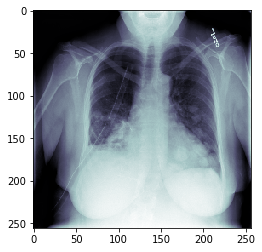

In [38]:
img = plt.imshow(test_scaled[0], cmap = plt.cm.bone)

In [41]:
len(test_scaled[0])

256

In [42]:
X_train=np.array(test_scaled)

In [43]:
X_train.shape

(1000, 256, 256)

In [44]:
y_train = targets_df[:1000].Target.values

In [46]:
X_train = X_train.reshape(X_train.shape[0], 256, 256 ,1 ).astype('float32')

In [47]:
X_train.shape

(1000, 256, 256, 1)

In [48]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
# one hot encode outputs
y_train = to_categorical(y_train)

In [49]:
num_classes = 2

In [50]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(256, 256, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [51]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2,
    validation_split = .2
)

Train on 800 samples, validate on 200 samples
Epoch 1/10
 - 52s - loss: 0.7010 - acc: 0.5087 - val_loss: 0.6881 - val_acc: 0.6450
Epoch 2/10
 - 48s - loss: 0.6900 - acc: 0.5538 - val_loss: 0.6696 - val_acc: 0.6450
Epoch 3/10
 - 48s - loss: 0.6883 - acc: 0.5538 - val_loss: 0.6738 - val_acc: 0.6450
Epoch 4/10
 - 48s - loss: 0.6883 - acc: 0.5538 - val_loss: 0.6707 - val_acc: 0.6450
Epoch 5/10
 - 48s - loss: 0.6883 - acc: 0.5538 - val_loss: 0.6628 - val_acc: 0.6450
Epoch 6/10
 - 48s - loss: 0.6894 - acc: 0.5538 - val_loss: 0.6742 - val_acc: 0.6450
Epoch 7/10
 - 48s - loss: 0.6878 - acc: 0.5538 - val_loss: 0.6670 - val_acc: 0.6450
Epoch 8/10
 - 48s - loss: 0.6877 - acc: 0.5538 - val_loss: 0.6669 - val_acc: 0.6450
Epoch 9/10
 - 48s - loss: 0.6876 - acc: 0.5538 - val_loss: 0.6684 - val_acc: 0.6450
Epoch 10/10
 - 48s - loss: 0.6888 - acc: 0.5538 - val_loss: 0.6802 - val_acc: 0.6450
